<a href="https://colab.research.google.com/github/001ckk/mchezo-pesa-ltd---football-game-prediction-/blob/main/Moringa_Data_Science_Core_W6_Independent_Project_2022_06_Christopher_Kimani_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GAME PREDICTION - MCHEZO PESA LTD.**

#**Introduction.**

**Specifying the Question.**


A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

**Metric of success**

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

**Context**

After a long period testing and analysing the best way to calculate the FIFA/Coca-Cola World Ranking, a new model took effect in August 2018 after approval by the FIFA Council.

This new version developed by FIFA was named "SUM" as it relies on adding/subtracting points won or lost for a game to/from the previous point totals rather than averaging game points over a given time period as in the previous version of the World Ranking.

**Experimental design**

In order to work on the above problem, you need to do the following:
1. Perform your EDA
2. Perform any necessary feature engineering 
3. Check of multicollinearity
4. Start building the model
5. Cross-validate the model
6. Compute RMSE
7. Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
8. Perform appropriate regressions on the data including your justification
9. Challenge your solution by providing insights on how you can make improvements.

**Data Relevance**

There are two datasets; ranking and results dataset [Dataset link](https://drive.google.com/file/d/1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc/view). They have appropriate columns to answer the questions. They are both relevant for our analysis.

Both our datasets consists of information on football rankings over time and are therefore suitable to create a model that will be used to predict the results

#**Data loading and cleaning**

In [436]:
# Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [437]:
# Loading the fifa_ranking data and previewing it 

ranking = pd.read_csv('fifa_ranking.csv')
ranking.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [438]:
# Loading the results data and previewing it 

results = pd.read_csv('results.csv')
results.head(5)



,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


**Checking and cleaning the data**

In [439]:
ranking.info()

# Shows the following:
 #column names
 #data types 
 #no. of rows and column (57793 rows, 16 columns)
 #non-null value count.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [440]:
ranking.isnull().sum()

# There are no null values in the fifa_ranking data set.

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [441]:
results.info()

# Shows the following:
 #column names
 #data types 
 #no. of rows and column (40839 rows, 9 columns)
 #non-null value count.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [442]:
results.isnull().sum()

# There are no null values in the results dataset 

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [443]:
# Dropping unecessary columns in the rankings data

ranking1 = ranking.drop(['country_abrv','cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
              'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
              'three_year_ago_avg', 'three_year_ago_weighted'], axis =1)
ranking1

,rank,country_full,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,0.0,57,0,UEFA,1993-08-08
1,2,Italy,0.0,57,0,UEFA,1993-08-08
2,3,Switzerland,0.0,50,9,UEFA,1993-08-08
3,4,Sweden,0.0,55,0,UEFA,1993-08-08
4,5,Argentina,0.0,51,5,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...
57788,206,Anguilla,0.0,0,1,CONCACAF,2018-06-07
57789,206,Bahamas,0.0,0,1,CONCACAF,2018-06-07
57790,206,Eritrea,0.0,0,1,CAF,2018-06-07
57791,206,Somalia,0.0,0,1,CAF,2018-06-07


In [444]:
# Dropping unecessary columns in the results data

results1 = results.drop(['city','neutral'], axis = 1)
results1

,date,home_team,away_team,home_score,away_score,tournament,country
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,England
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,England
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland
...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Samoa
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Samoa
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Egypt
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,India


In [445]:
# Checking outliers in the ranking1 data
# The outliers in this data make sense, points can change drastically and the rank_change is within the number of teams available
# Thus I will do nothing to outliers here.

q1 = ranking1.quantile(0.25)
q3 = ranking1.quantile(0.75)
iqr = q3 -q1
outliers = ranking1[((ranking1 < (q1 - 1.5*iqr))|(ranking1 > (q3 + 1.5*iqr)))]
outliers.count()

rank                   0
country_full           0
total_points       10952
previous_points      754
rank_change         8359
confederation          0
rank_date              0
dtype: int64

In [446]:
# Checking outliers in the ranking1 data
# Since this is correct fifa information, I will not be dropping the outliers.


q1 = results1.quantile(0.25)
q3 = results1.quantile(0.75)
iqr = q3 -q1
outliers1 = results1[((results1 < (q1 - 1.5*iqr))|(results1 > (q3 + 1.5*iqr)))]
outliers1.count()


date             0
home_team        0
away_team        0
home_score    5124
away_score     570
tournament       0
country          0
dtype: int64

#**Merging the two datasets**

In [447]:
results1.date = pd.to_datetime(results1.date)

results1['year'] = results1.date.dt.year
results1['month'] = results1.date.dt.month
results1.head()

,date,home_team,away_team,home_score,away_score,tournament,country,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,England,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,England,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,1876,3


In [448]:
ranking1.rank_date = pd.to_datetime(ranking1.rank_date)

ranking1['year'] = ranking1.rank_date.dt.year
ranking1['month'] = ranking1.rank_date.dt.month
ranking1.head()

,rank,country_full,total_points,previous_points,rank_change,confederation,rank_date,year,month
0,1,Germany,0.0,57,0,UEFA,1993-08-08,1993,8
1,2,Italy,0.0,57,0,UEFA,1993-08-08,1993,8
2,3,Switzerland,0.0,50,9,UEFA,1993-08-08,1993,8
3,4,Sweden,0.0,55,0,UEFA,1993-08-08,1993,8
4,5,Argentina,0.0,51,5,CONMEBOL,1993-08-08,1993,8


In [449]:
# Checking the length of the datasets. 

print(results1.year.unique())
print('*********************')
print(ranking1.year.unique())

[1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885
 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899
 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
*********************
[1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]


In [450]:
# Since the ranking1 dataset runs from 1993 -2018, I have chosen only these years in the results2 dataset.

results2 = results1.loc[(results1['year'] >= 1993)]
results2.head()

,date,home_team,away_team,home_score,away_score,tournament,country,year,month
17361,1993-01-01,Ghana,Mali,1,1,Friendly,Gabon,1993,1
17362,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,1993,1
17363,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,1993,1
17364,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,1993,1
17365,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,1993,1


In [451]:
print(results2.year.unique())
print('*********************')
print(ranking1.year.unique())

[1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
*********************
[1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]


**Obtaining home team rank**

In [452]:
# Merging the two data sets to create a new dataset

home_rank = pd.merge(results2, ranking1 , how = 'inner', left_on = ['year', 'month','home_team'], right_on = ['year', 'month','country_full'])
home_rank.head()

,date,home_team,away_team,home_score,away_score,tournament,country,year,month,rank,country_full,total_points,previous_points,rank_change,confederation,rank_date
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,1993,8,19,Colombia,0.0,36,16,CONMEBOL,1993-08-08
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,1993,8,19,Colombia,0.0,36,16,CONMEBOL,1993-08-08
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Colombia,1993,8,19,Colombia,0.0,36,16,CONMEBOL,1993-08-08
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,1993,8,70,Peru,0.0,16,8,CONMEBOL,1993-08-08
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Peru,1993,8,70,Peru,0.0,16,8,CONMEBOL,1993-08-08


In [453]:
# Renaming some columns and dropping unwanted columns

home_rank.rank = home_rank.rename({'rank': 'home_rank'}, axis = 1, inplace = True)
home_rank.country_x = home_rank.rename({'country_full': 'home_country'}, axis = 1, inplace = True)
home_rank.drop(['date','country','rank_date'], axis = 1, inplace = True)

In [454]:
home_rank.head()

,home_team,away_team,home_score,away_score,tournament,year,month,home_rank,home_country,total_points,previous_points,rank_change,confederation
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,1993,8,19,Colombia,0.0,36,16,CONMEBOL
1,Colombia,Argentina,2,1,FIFA World Cup qualification,1993,8,19,Colombia,0.0,36,16,CONMEBOL
2,Colombia,Peru,4,0,FIFA World Cup qualification,1993,8,19,Colombia,0.0,36,16,CONMEBOL
3,Peru,Argentina,0,1,FIFA World Cup qualification,1993,8,70,Peru,0.0,16,8,CONMEBOL
4,Peru,Colombia,0,1,FIFA World Cup qualification,1993,8,70,Peru,0.0,16,8,CONMEBOL


**Obtaining away team rank**

In [455]:
away_rank = pd.merge(ranking1, results1, how = 'inner', left_on = ['year', 'month','country_full'], right_on = ['year', 'month','away_team'])
away_rank.head()

,rank,country_full,total_points,previous_points,rank_change,confederation,rank_date,year,month,date,home_team,away_team,home_score,away_score,tournament,country
0,3,Switzerland,0.0,50,9,UEFA,1993-08-08,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden
1,5,Argentina,0.0,51,5,CONMEBOL,1993-08-08,1993,8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru
2,5,Argentina,0.0,51,5,CONMEBOL,1993-08-08,1993,8,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay
3,5,Argentina,0.0,51,5,CONMEBOL,1993-08-08,1993,8,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia
4,8,Brazil,0.0,55,-5,CONMEBOL,1993-08-08,1993,8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela


In [456]:
# Renaming some columns and dropping unwanted columns

away_rank.rank = away_rank.rename({'rank': 'away_rank'}, axis = 1, inplace = True)
away_rank.country_x = away_rank.rename({'country_full': 'away_country'}, axis = 1, inplace = True)
away_rank.drop(['date','country','rank_date','home_team'], axis = 1, inplace = True)

In [457]:
away_rank.head()

,away_rank,away_country,total_points,previous_points,rank_change,confederation,year,month,away_team,home_score,away_score,tournament
0,3,Switzerland,0.0,50,9,UEFA,1993,8,Switzerland,1,2,Friendly
1,5,Argentina,0.0,51,5,CONMEBOL,1993,8,Argentina,0,1,FIFA World Cup qualification
2,5,Argentina,0.0,51,5,CONMEBOL,1993,8,Argentina,1,3,FIFA World Cup qualification
3,5,Argentina,0.0,51,5,CONMEBOL,1993,8,Argentina,2,1,FIFA World Cup qualification
4,8,Brazil,0.0,55,-5,CONMEBOL,1993,8,Brazil,1,5,FIFA World Cup qualification


**Combining home team and away team**

In [458]:
home_away = pd.merge(home_rank, away_rank, how = 'inner', left_on = ['year', 'month','away_team'], right_on = ['year', 'month','away_team'])
home_away.head()

,home_team,away_team,home_score_x,away_score_x,tournament_x,year,month,home_rank,home_country,total_points_x,...,confederation_x,away_rank,away_country,total_points_y,previous_points_y,rank_change_y,confederation_y,home_score_y,away_score_y,tournament_y
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,1993,8,19,Colombia,0.0,...,CONMEBOL,67,Paraguay,0.0,22,1,CONMEBOL,0,0,FIFA World Cup qualification
1,Colombia,Paraguay,0,0,FIFA World Cup qualification,1993,8,19,Colombia,0.0,...,CONMEBOL,67,Paraguay,0.0,22,1,CONMEBOL,0,0,FIFA World Cup qualification
2,Argentina,Paraguay,0,0,FIFA World Cup qualification,1993,8,5,Argentina,0.0,...,CONMEBOL,67,Paraguay,0.0,22,1,CONMEBOL,0,0,FIFA World Cup qualification
3,Argentina,Paraguay,0,0,FIFA World Cup qualification,1993,8,5,Argentina,0.0,...,CONMEBOL,67,Paraguay,0.0,22,1,CONMEBOL,0,0,FIFA World Cup qualification
4,Colombia,Argentina,2,1,FIFA World Cup qualification,1993,8,19,Colombia,0.0,...,CONMEBOL,5,Argentina,0.0,51,5,CONMEBOL,0,1,FIFA World Cup qualification


In [459]:
home_away1 = home_away[['home_rank','away_rank','home_country', 'away_country','home_team','away_team','home_score_x','away_score_y','tournament_x','month','year','total_points_x','previous_points_x']]
home_away1.head()


,home_rank,away_rank,home_country,away_country,home_team,away_team,home_score_x,away_score_y,tournament_x,month,year,total_points_x,previous_points_x
0,19,67,Colombia,Paraguay,Colombia,Paraguay,0,0,FIFA World Cup qualification,8,1993,0.0,36
1,19,67,Colombia,Paraguay,Colombia,Paraguay,0,0,FIFA World Cup qualification,8,1993,0.0,36
2,5,67,Argentina,Paraguay,Argentina,Paraguay,0,0,FIFA World Cup qualification,8,1993,0.0,51
3,5,67,Argentina,Paraguay,Argentina,Paraguay,0,0,FIFA World Cup qualification,8,1993,0.0,51
4,19,5,Colombia,Argentina,Colombia,Argentina,2,1,FIFA World Cup qualification,8,1993,0.0,36


In [460]:
# Renaming the columns

home_away1.home_score_x = home_away1.rename({'home_score_x': 'home_score'}, axis = 1, inplace = True)
home_away1.away_score_y = home_away1.rename({'away_score_y': 'away_score'}, axis = 1, inplace = True)
home_away1.tournament_x = home_away1.rename({'tournament_x': 'tournament'}, axis = 1, inplace = True)
home_away1.total_points_x = home_away1.rename({'total_points_x': 'total_points'}, axis = 1, inplace = True)
home_away1.previous_points_x = home_away1.rename({'previous_points_x': 'previous_points'}, axis = 1, inplace = True)

In [461]:
home_away1.head()

,home_rank,away_rank,home_country,away_country,home_team,away_team,home_score,away_score,tournament,month,year,total_points,previous_points
0,19,67,Colombia,Paraguay,Colombia,Paraguay,0,0,FIFA World Cup qualification,8,1993,0.0,36
1,19,67,Colombia,Paraguay,Colombia,Paraguay,0,0,FIFA World Cup qualification,8,1993,0.0,36
2,5,67,Argentina,Paraguay,Argentina,Paraguay,0,0,FIFA World Cup qualification,8,1993,0.0,51
3,5,67,Argentina,Paraguay,Argentina,Paraguay,0,0,FIFA World Cup qualification,8,1993,0.0,51
4,19,5,Colombia,Argentina,Colombia,Argentina,2,1,FIFA World Cup qualification,8,1993,0.0,36


#**Exploratory Data Analysis**

**Univariate**

In [462]:
home_away1.describe()

,home_rank,away_rank,home_score,away_score,month,year,total_points,previous_points
count,28518.000000,28518.000000,28518.000000,28518.000000,28518.000000,28518.000000,28518.000000,28518.000000
mean,78.456449,81.480574,1.595589,1.107511,6.723438,2006.196683,157.305015,418.343713
std,51.079457,52.538276,1.634277,1.311102,3.361838,6.842606,308.226022,315.813190
min,1.000000,1.000000,0.000000,0.000000,1.000000,1993.000000,0.000000,0.000000
25%,35.000000,38.000000,0.000000,0.000000,4.000000,2000.000000,0.000000,150.000000
50%,74.000000,76.000000,1.000000,1.000000,6.000000,2006.000000,0.000000,399.000000
75%,114.000000,119.000000,2.000000,2.000000,10.000000,2012.000000,194.557500,595.000000
max,209.000000,209.000000,31.000000,18.000000,12.000000,2018.000000,1770.060000,1887.000000


**Bivariate**

In [463]:
# Correlation 

home_away1.corr()

,home_rank,away_rank,home_score,away_score,month,year,total_points,previous_points
home_rank,1.000000,0.514813,-0.115309,0.136520,0.068282,0.092840,-0.299011,-0.653222
away_rank,0.514813,1.000000,0.307034,-0.139815,0.068660,0.092347,-0.146631,-0.310698
home_score,-0.115309,0.307034,1.000000,-0.122204,0.019208,-0.052746,0.012116,0.069722
away_score,0.136520,-0.139815,-0.122204,1.000000,0.019913,-0.014701,-0.044318,-0.083731
month,0.068282,0.068660,0.019208,0.019913,1.000000,-0.007457,0.010915,-0.069358
year,0.092840,0.092347,-0.052746,-0.014701,-0.007457,1.000000,0.624476,0.407829
total_points,-0.299011,-0.146631,0.012116,-0.044318,0.010915,0.624476,1.000000,0.546566
previous_points,-0.653222,-0.310698,0.069722,-0.083731,-0.069358,0.407829,0.546566,1.000000


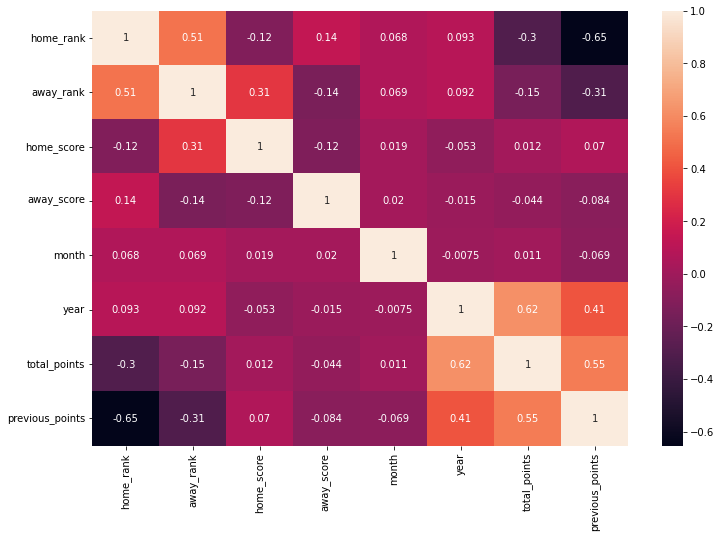

In [464]:
# heat map showing the visuals of the correlation.

correlations = home_away1.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlations, 
            xticklabels = correlations.columns.values,
            yticklabels = correlations.columns.values,
            annot = True);

#**Building the model**

**Feature Engineering**

In [465]:
# Getting the goal difference. 

home_away1['goal_diff'] = home_away1['home_score'] - home_away1['away_score']
home_away1.head()

,home_rank,away_rank,home_country,away_country,home_team,away_team,home_score,away_score,tournament,month,year,total_points,previous_points,goal_diff
0,19,67,Colombia,Paraguay,Colombia,Paraguay,0,0,FIFA World Cup qualification,8,1993,0.0,36,0
1,19,67,Colombia,Paraguay,Colombia,Paraguay,0,0,FIFA World Cup qualification,8,1993,0.0,36,0
2,5,67,Argentina,Paraguay,Argentina,Paraguay,0,0,FIFA World Cup qualification,8,1993,0.0,51,0
3,5,67,Argentina,Paraguay,Argentina,Paraguay,0,0,FIFA World Cup qualification,8,1993,0.0,51,0
4,19,5,Colombia,Argentina,Colombia,Argentina,2,1,FIFA World Cup qualification,8,1993,0.0,36,1


In [466]:
# Creating a column to show if it is a win, loss or draw.

def home_team(home_scores):
    if home_scores > 0:
        return 'Win'
    elif home_scores < 0:
        return 'Loss'
    else:
        return 'Draw'
      
home_away1['outcome'] = home_away1.goal_diff.apply(lambda h: home_team(h))
home_away1.head()

,home_rank,away_rank,home_country,away_country,home_team,away_team,home_score,away_score,tournament,month,year,total_points,previous_points,goal_diff,outcome
0,19,67,Colombia,Paraguay,Colombia,Paraguay,0,0,FIFA World Cup qualification,8,1993,0.0,36,0,Draw
1,19,67,Colombia,Paraguay,Colombia,Paraguay,0,0,FIFA World Cup qualification,8,1993,0.0,36,0,Draw
2,5,67,Argentina,Paraguay,Argentina,Paraguay,0,0,FIFA World Cup qualification,8,1993,0.0,51,0,Draw
3,5,67,Argentina,Paraguay,Argentina,Paraguay,0,0,FIFA World Cup qualification,8,1993,0.0,51,0,Draw
4,19,5,Colombia,Argentina,Colombia,Argentina,2,1,FIFA World Cup qualification,8,1993,0.0,36,1,Win


In [467]:
# Creating new csv data file to work with 

home_away2 = home_away1[['home_team','away_team','home_score','away_score','tournament','home_rank','away_rank','outcome']]
home_away2.to_csv('predictions.csv')
predictions = pd.read_csv('predictions.csv')
predictions.head(5)

,Unnamed: 0,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,outcome
0,0,Colombia,Paraguay,0,0,FIFA World Cup qualification,19,67,Draw
1,1,Colombia,Paraguay,0,0,FIFA World Cup qualification,19,67,Draw
2,2,Argentina,Paraguay,0,0,FIFA World Cup qualification,5,67,Draw
3,3,Argentina,Paraguay,0,0,FIFA World Cup qualification,5,67,Draw
4,4,Colombia,Argentina,2,1,FIFA World Cup qualification,19,5,Win


#**Polynomial Regression**

**Predicting home_scores**

In [468]:
# Encoding the data 

Predictions = pd.get_dummies(predictions, drop_first = True)

In [469]:
# defining the x and y variables

x = Predictions.iloc[:, [ 1, 2, 4, 5, 6, 7]]
y = Predictions.home_score

In [470]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [471]:
# Linear regression.

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [472]:
# Predicting the y

y_pred = regressor.predict(x_test)
print(regressor.intercept_)
print('*****')
print(regressor.coef_)

# An increase in any of the x values will cause a B's change in the y value 

6.217248937900877e-15
*****
[ 1.00000000e+00  2.11215043e-17  5.86273701e-17 -2.10829561e-17
  1.13311060e-14 -1.83858939e-17]


In [473]:
from sklearn import metrics

# Obtaining the RMSE - Root mean squared error

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Root Mean Squared Error: 1.0595668134754175e-14


Since the RMSE is quite low, it means that the model is not the best for prediction.

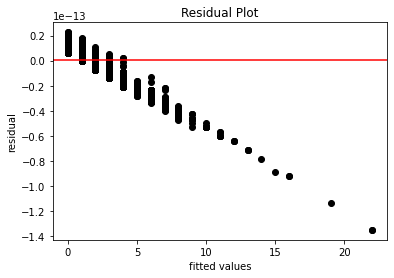

In [474]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()

**Predicting away_scores**

In [475]:
# defining the x and y variables

x = Predictions.iloc[:, [ 1, 2, 3, 5, 6, 7]]
y = Predictions.away_score

In [476]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [477]:
# Linear regression.

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [478]:
# Predicting the y

y_pred = regressor.predict(x_test)
print(regressor.intercept_)
print('*****')
print(regressor.coef_)

# An increase in any of the x values will cause a B's change in the y value 

-9.769962616701378e-15
*****
[2.03682521e-16 1.00000000e+00 1.11022302e-16 3.36102673e-17
 2.45029691e-17 1.95834017e-17]


In [479]:
from sklearn import metrics

# Obtaining the RMSE - Root mean squared error

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Root Mean Squared Error: 5.927217984627089e-15


Since the RMSE is quite low, it means that the model is not the best for prediction.

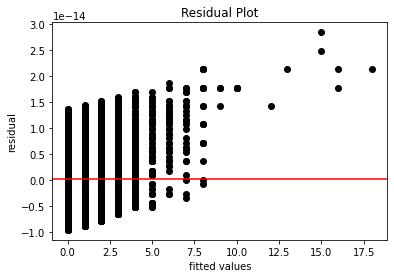

In [480]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()

#**Logistic Regression**

In [481]:
x = Predictions.iloc[:, [ 1, 2, 4, 5, 6, 7]]
y = Predictions.iloc[:,8]

In [482]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [483]:
# Linear regression.

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [484]:
# Predicting the y and obtaining the betas

y_pred = regressor.predict(x_test)
print(regressor.intercept_)
print('*****')
print(regressor.coef_)

# An increase in any of the x values will cause a B's change in the y value 

0.004308135191434288
*****
[-1.25274527e-03  1.28689067e-03 -7.46568337e-06 -3.81009150e-03
 -2.89716442e-03 -6.06429487e-03]


In [485]:
from sklearn import metrics

# Obtaining the RMSE - Root mean squared error

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Root Mean Squared Error: 0.06461619745581539


Since the RMSE is quite low, it means that the model is not the best for prediction.

#**Challenging the solution**





1.   Very high scores in a football match are not very common, these high scores could be removed as outliers.
2.   Another regression model could be used to check the accuracy of the work. 





